In [47]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [48]:
# Reading Training Data
from pathlib import Path
# Define the base directory dynamically (like home folder)
base_dir = Path.home()

# Build the full file path
file_path = base_dir / 'anaconda3' / 'envs' / 'ApplicationMLModels_PredictHeartDisease' / 'statlog+heart' /'heart_data.csv'
#print(file_path)
#file_name = 'heart_data.csv'
#complete_filepath = file_path / file_name
#filepath = complete_filepath.resolve()

# Brief overview of Dataset
heart_df = pd.read_csv(file_path)
heart_df.head()

,patient_id,heart_disease_present,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol_mg_per_dl,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak_eq_st_depression,slope_of_peak_exercise_st_segment,num_major_vessels,thal
0,034N95xw,1,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,IBygtBAP,0,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,zI70cfhM,1,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,qXkCdEiv,0,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,IAA2korm,0,74,0,2,120,269,0,2,121,1,0.2,1,1,3


## Multilayer Perceptron Neural Network

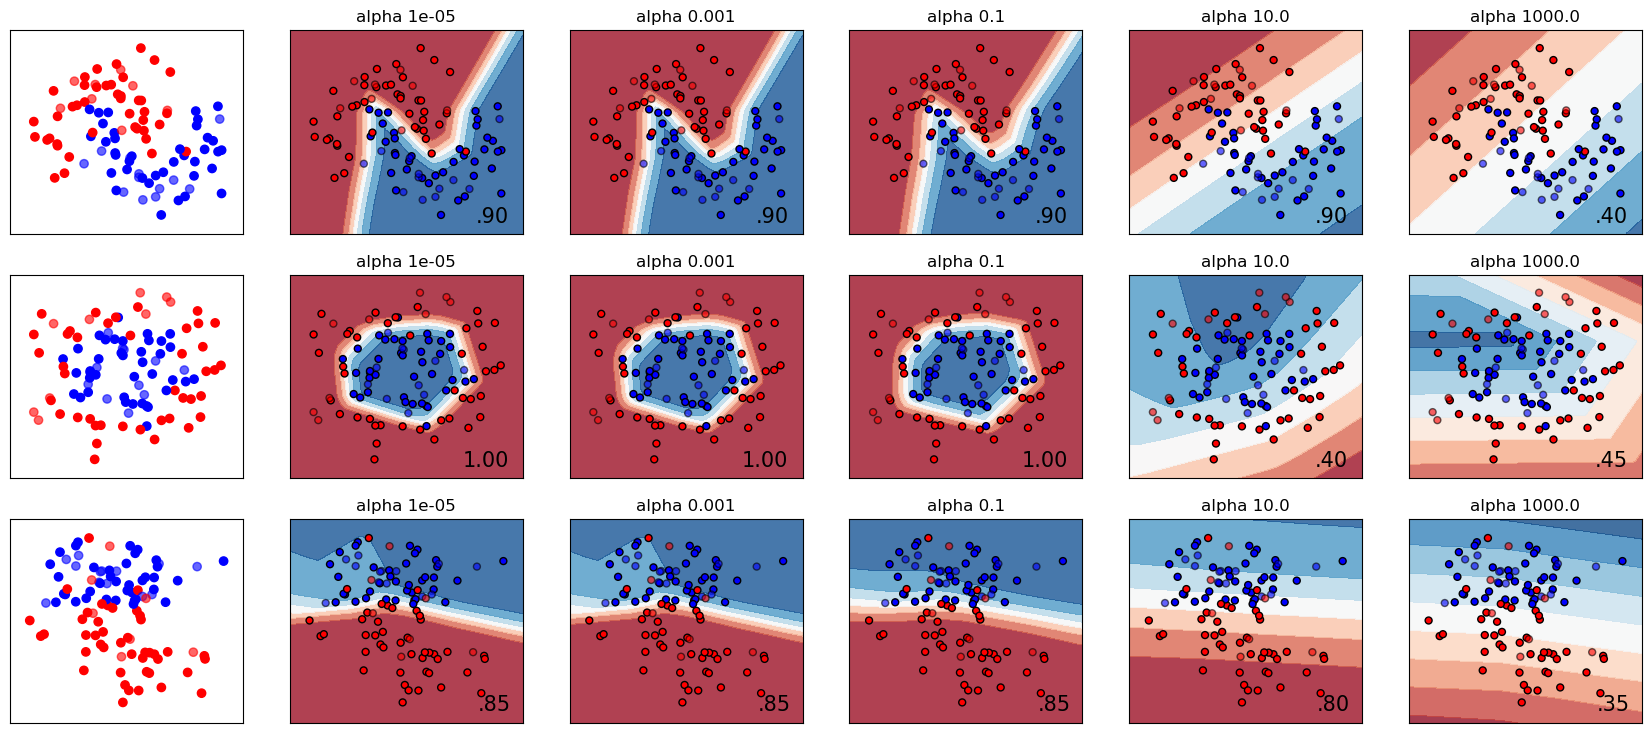

In [49]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

h = .05  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
names = []
for i in alphas:
    names.append('alpha ' + str(i))

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(hidden_layer_sizes=(50,), max_iter=2000, alpha=i, random_state=1))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

heart_df = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in heart_df:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(heart_df), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(heart_df), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()


This above diagramatic repreentation shows the presence ot absence of heart diseases classified within the Patient set at different Confidence Interval. Seems like the Model performed at it's best at 90%, indicating that the probbaility that the Model will correctly classify the presence and the absence of heart diseases in patient is 90%. In other words that we are 90% confident that the Model will classify and detect the presence and absence of heart disease correctly. 

## Data Preparation

In [50]:
#heart_df.head(5)
type(heart_df)
heart_df = pd.DataFrame(heart_df)

In [51]:
# Reading Training Data
from pathlib import Path
# Define the base directory dynamically (like home folder)
base_dir = Path.home()

# Build the full file path
file_path = base_dir / 'anaconda3' / 'envs' / 'ApplicationMLModels_PredictHeartDisease' / 'statlog+heart' /'heart_data.csv'
#print(file_path)
#file_name = 'heart_data.csv'
#complete_filepath = file_path / file_name
#filepath = complete_filepath.resolve()

# Brief overview of Dataset
heart_df = pd.read_csv(file_path)
heart_df.head()

,patient_id,heart_disease_present,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol_mg_per_dl,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak_eq_st_depression,slope_of_peak_exercise_st_segment,num_major_vessels,thal
0,034N95xw,1,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,IBygtBAP,0,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,zI70cfhM,1,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,qXkCdEiv,0,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,IAA2korm,0,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [52]:
heart_df.drop(['patient_id'], axis=1, inplace=True)
heart_df.head()

X = heart_df.drop('heart_disease_present', axis=1)  
y = heart_df['heart_disease_present'] 

In [53]:
# Data Splitting
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

## Data Preprocessing

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
# Fitting the Training Data
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
scaler.fit(X_train)


StandardScaler()

In [56]:
# Applying Transformations to Data
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training Multilayer Perceptron Classifier Model

In [57]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20),max_iter=1000)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)

## Predictions and Evaluations

In [58]:
## predictions and Evaluation
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[25  5]
 [ 9 15]]


In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        30
           1       0.75      0.62      0.68        24

    accuracy                           0.74        54
   macro avg       0.74      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



Thus, we can conclude that our Model performs 74% accurately the absence of a heart disease in a patient. And this Model, performs 74% accurately in predicting the presence of heart disease in patient.